# Homework 4


#### Fake Data

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

t = np.linspace(0, np.pi*100, int(1e5))
N = 10+np.sin(t)
bkgd = stats.norm.rvs(size=int(1e5))*np.sqrt(N)+N


#### Problem 1

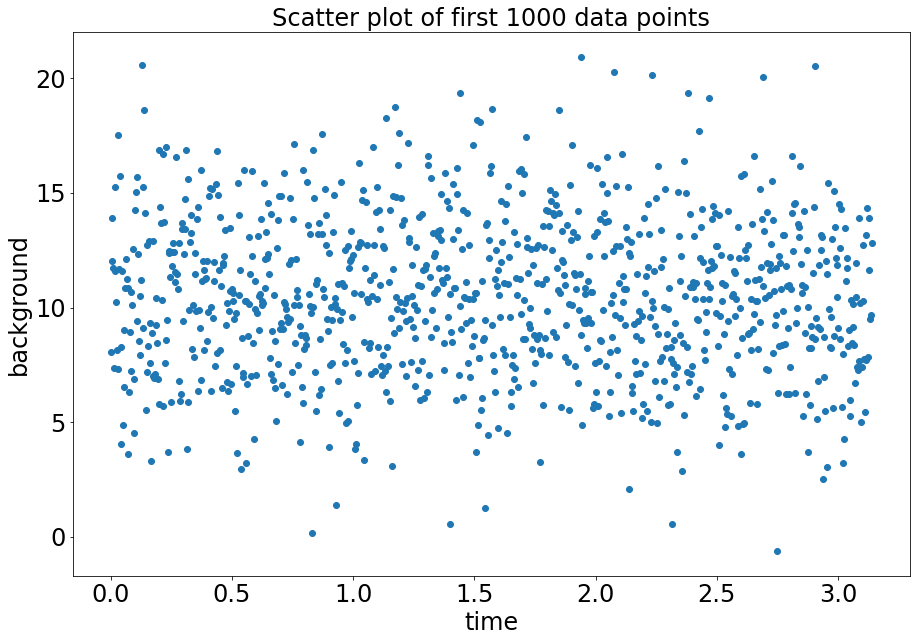

In [19]:
# Problem 1 A
slice1 = bkgd[0:1000]

plt.scatter(t[0:1000], slice1)
plt.tick_params(labelsize = 24)
plt.xlabel("time", fontsize = 24)
plt.ylabel("background", fontsize = 24)
plt.title("Scatter plot of first 1000 data points", fontsize = 24);

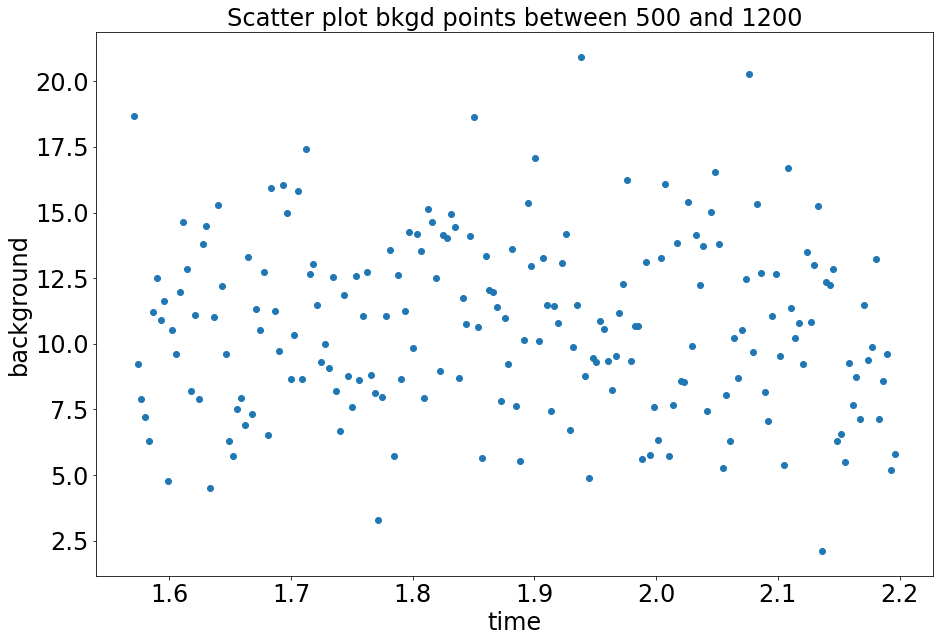

In [21]:
# Problem 1 B

def makePlot(x, y, start, N, step = 1):
    
    plt.scatter(x[int(start):int(N):int(step)], y[int(start):int(N):int(step)])
    plt.tick_params(labelsize = 24)

makePlot(t, bkgd, 500, 700)
plt.xlabel("time", fontsize = 24)
plt.ylabel("background", fontsize = 24)
plt.title("Scatter plot bkgd points between 500 and 1200", fontsize = 24);

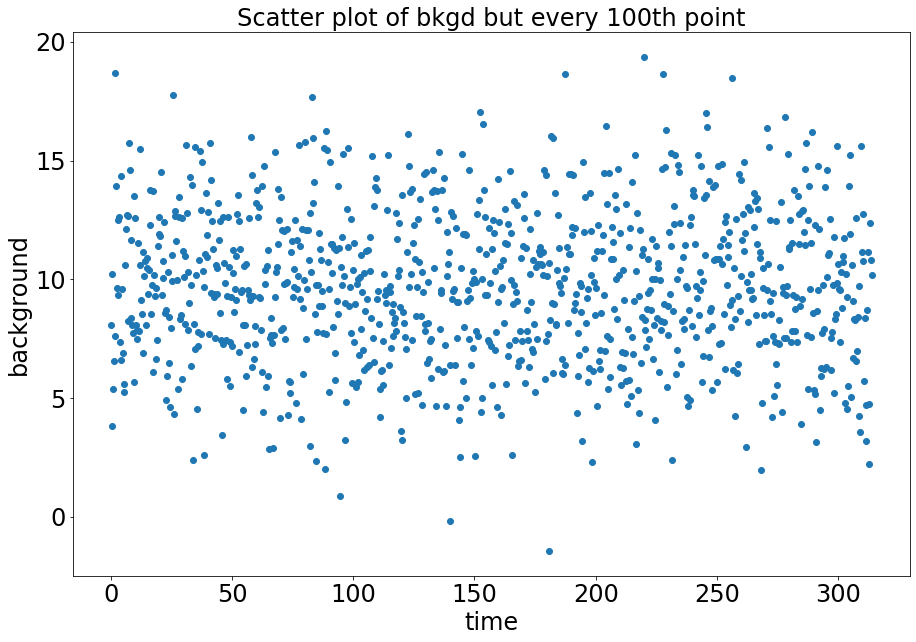

In [22]:
# Problem 1 C

makePlot(t, bkgd, 0, 1e5, 100)
plt.xlabel("time", fontsize = 24)
plt.ylabel("background", fontsize = 24)
plt.title("Scatter plot of bkgd but every 100th point", fontsize = 24);

#### Problem 2

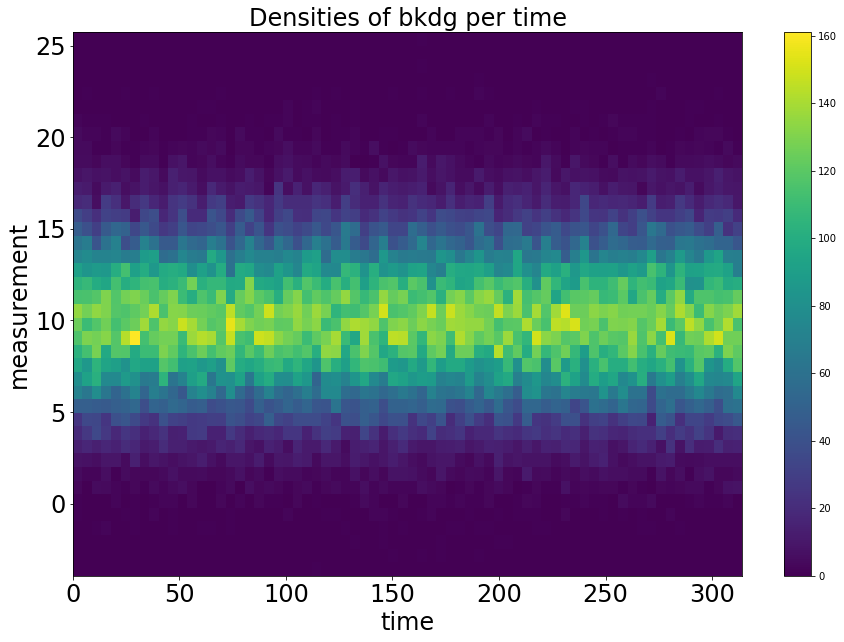

In [23]:
plt.tick_params(labelsize = 24)
plt.hist2d(t, bkgd, bins = [70, 40]);
plt.colorbar()
plt.xlabel("time", fontsize = 24)
plt.ylabel("measurement", fontsize = 24)
plt.title("Densities of bkdg per time", fontsize = 24);

- Problem 2B
  The plot above shows the density of the data across the entire time interval. A single box corresponds to some small interval of time by some small interval of measurement value. The color of each small box corresponds to the number of measuremments made in that area, i.e. the number of measurements in range $\Delta y$ per some interval $\Delta t$. Brighter colors mean more data falls into that box.

#### Problem 4

The original time had 10^5 data points bewteen $0$ and $100\pi$ and the data was distributed according to a sin function which has a period of $2pi$.

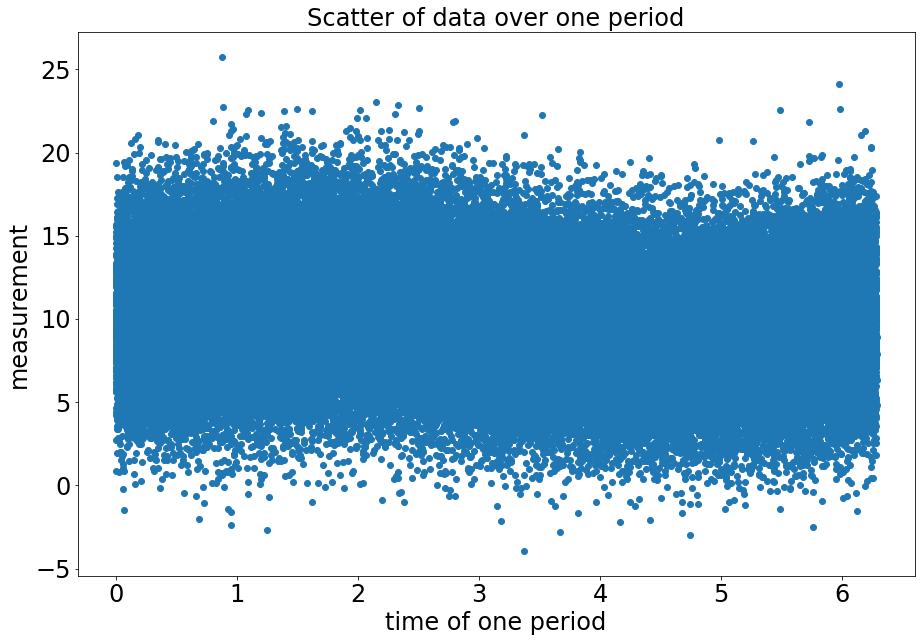

In [28]:
tnew = t % (2*np.pi)

makePlot(tnew, bkgd, 0, 1e5)
plt.xlabel("time of one period", fontsize = 24)
plt.ylabel("measurement", fontsize = 24)
plt.title("Scatter of data over one period", fontsize = 24);

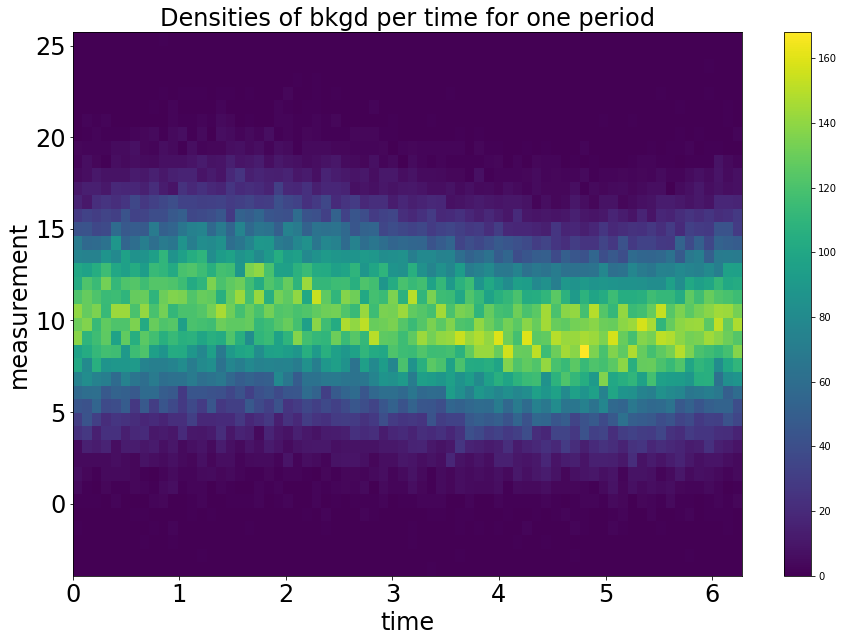

In [61]:
plt.tick_params(labelsize = 24)


plt.hist2d(tnew, bkgd, bins = [70, 40]);
plt.colorbar()
plt.xlabel("time", fontsize = 24)
plt.ylabel("measurement", fontsize = 24)
plt.title("Densities of bkgd per time for one period", fontsize = 24);

The periodicity of the function can be much more easily seen in this photo. The highest density points have moved closer to overlap the part of the background represented by the sin function. 

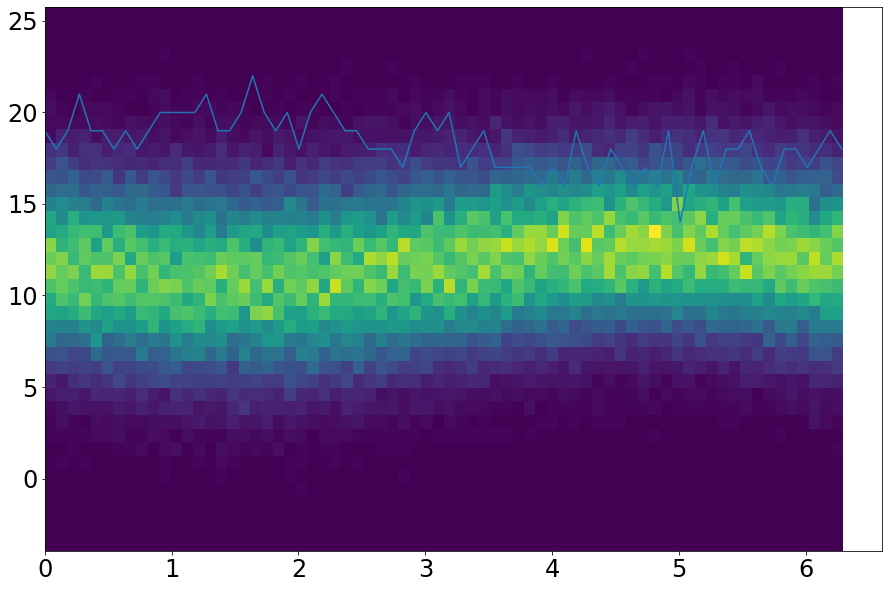

In [115]:
H, xedges, yedges = np.histogram2d(tnew, bkgd, bins = [70, 40])
H = H.T

binofMean = np.argmax(H, 0)
x = np.linspace(0, np.pi*2, 70)

plt.tick_params(labelsize = 24)
plt.imshow(H, aspect = 'auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.plot(x, binofMean)